In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import random   
import scipy.stats

In [2]:
def network_generator_topo(edges,nodes):
    net=pd.DataFrame([[0]*3]*edges)
    net.columns=['Source','Target','Type']

    ratio=edges/nodes
    for j in range(edges):
            if j%nodes==0:
                 i=0                
                 
            if i>9:
                net.loc[j,'Source']='N'+str(i)
                net.loc[j,'Target']='N'+str(i)
            else:
                net.loc[j,'Source'] = 'N0'+ str(i)
                net.loc[j,'Target'] = 'N0'+ str(i)
            i=i+1

    half=int(edges/2)
    net.loc[:,'Type']=[1]*half + [2]*half
    return net

,Source,Target,Type
0,N00,N00,1
1,N01,N01,1
2,N02,N02,1
3,N03,N03,1
4,N04,N04,1
5,N05,N05,1
6,N06,N06,1
7,N07,N07,1
8,N08,N08,1
9,N09,N09,1


In [3]:
def Topo_adj(dp):
    n=len(set(dp['Source']))
    adj = pd.DataFrame([[0]*n]*n)
    adj.columns=list(set(dp.loc[:,'Source']))
    print(list(set(dp.loc[:,'Source'])))
    #print(set(dp.loc[:,'Source']))
    adj.index=list(set(dp.loc[:,'Target']))
    print(list(set(dp.loc[:,'Target'])))
    for i in range(len(dp)):
        if dp.iloc[i,2] == 1:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = 1
        elif dp.iloc[i,2] == 2:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = -1

    

    return adj


In [4]:
def core__generator_topo(nodes,start):
    net=pd.DataFrame([[0]*3])
    net.columns=['Source','Target','Type']

    mid = int(nodes/2)
    tar=[]

    for j in range(nodes*nodes):
        k = j//nodes
        i=j%nodes
        net.loc[j,'Source']='N'+str(k+start)
        net.loc[j,'Target']='N'+str(i+start)

        if (k in range(mid) and i in range(mid)) or (k >= mid and i >=mid ):
            net.loc[j,'Type']=1
        else:
            net.loc[j,'Type']=2
    net.loc[:,'comb']=net.loc[:,'Source']+net.loc[:,'Target']
    return net

In [5]:
def triad_team_generator(team_size,start,nodes,self_act=True):
    net=pd.DataFrame([[0]*3])
    net.columns=['Source','Target','Type']
    mid_2 = int(nodes/3)
    k =0

    for i in range(nodes):
        for j in range(nodes):
            if i//team_size != j//team_size:
                #print(i,j,i//team_size ,j//team_size )
                net.loc[k,'Source']='N'+str(i+start).zfill(2)
                net.loc[k,'Target']='N'+str(j+start).zfill(2)
                net.loc[k,'Type']=2
                #print('N'+str(i+start).zfill(2))
                k +=1
            elif self_act:
                net.loc[k,'Source']='N'+str(i+start).zfill(2)
                net.loc[k,'Target']='N'+str(j+start).zfill(2)
                net.loc[k,'Type']=1
                k +=1
            
    return net

            



In [6]:
def matrix_index_sort(mat):
    mat = mat.sort_index()
    mat = mat.T
    mat = mat.sort_index()
    mat = mat.T
    return mat

In [7]:
def adj_topify(adj):
    topi=pd.DataFrame()

    for i in adj.columns:
        #print(i)
        for j in adj.columns:
            #print(j)
            if adj.loc[i,j] == 1:
                t=str(i)
                s=str(j)
                #print(adj.loc[i,j])
                topi=pd.concat([topi,pd.DataFrame([[t,s,int(1)]])],ignore_index=True)
            elif adj.loc[i,j] == -1:
                t=str(i)
                s=str(j)
                #print(adj.loc[i,j])
                topi=pd.concat([topi,pd.DataFrame([[t,s,int(2)]])],ignore_index=True)
            
            
    topi.columns= ['Source','Target','Type']
    return topi




In [8]:
def Topo_adj(dp):
    n=len(set(dp['Source']))
    adj = pd.DataFrame([[0]*n]*n)
    adj.columns=list(set(dp.loc[:,'Source']))
    print(list(set(dp.loc[:,'Source'])))
    #print(set(dp.loc[:,'Source']))
    adj.index=list(set(dp.loc[:,'Target']))
    print(list(set(dp.loc[:,'Target'])))
    for i in range(len(dp)):
        if dp.iloc[i,2] == 1:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = 1
        elif dp.iloc[i,2] == 2:
            adj.loc[dp.iloc[i,0] , dp.iloc[i,1] ] = -1

    

    return adj


In [9]:
def network_generator_topo(edges,nodes):
    net=pd.DataFrame([[0]*3]*edges)
    net.columns=['Source','Target','Type']

    ratio=edges/nodes
    for j in range(edges):
            if j%nodes==0:
                 i=0                
                 
            if i>9:
                net.loc[j,'Source']='N'+str(i)
                net.loc[j,'Target']='N'+str(i)
            else:
                net.loc[j,'Source'] = 'N0'+ str(i)
                net.loc[j,'Target'] = 'N0'+ str(i)
            i=i+1

    half=int(edges/2)
    net.loc[:,'Type']=[1]*half + [2]*half
    return net

In [10]:
def core__generator_topo(nodes,start):
    net=pd.DataFrame([[0]*3])
    net.columns=['Source','Target','Type']

    mid = int(nodes/2)
    tar=[]

    for j in range(nodes*nodes):
        k = j//nodes
        i=j%nodes
        net.loc[j,'Source']='N'+str(k+start)
        net.loc[j,'Target']='N'+str(i+start)

        if (k in range(mid) and i in range(mid)) or (k >= mid and i >=mid ):
            net.loc[j,'Type']=1
        else:
            net.loc[j,'Type']=2
    net.loc[:,'comb']=net.loc[:,'Source']+net.loc[:,'Target']
    return net

In [11]:
def middle_generator_ratio_average(core,peri, ratio):
    net=pd.DataFrame([[0]*4])
    net.columns=['Source','Target','Type','comb']
    peri_nodes = len(set(peri.loc[:,'Source']))
    core_nodes = len(set(core.loc[:,'Source']))
    

    edges_needed= ratio*core_nodes
    print(edges_needed,ratio,core_nodes)
    
    mid = int(edges_needed/2)

    peri_nodes_names = list(set(peri.loc[:,'Source']))
    core_nodes_names = list(set(core.loc[:,'Source']))
    combilist = []

    while len(set(net.loc[:,'comb'])) != 2*edges_needed:
        for i in range(edges_needed*2):

            if i < edges_needed:
                flag = 1
                while flag:
                    sour = random.sample(peri_nodes_names,1)[0]
                    targ = random.sample(core_nodes_names,1)[0]
                    combi = sour+targ
                    if combi not in combilist:
                        flag = 0
                        combilist.append(combi)
                        net.loc[i,'Source']= sour
                        net.loc[i,'Target']= targ
                        net.loc[i,'Type']= 1
 
            else:
                flag1 =1
                while flag1:
                    sour = random.sample(core_nodes_names,1)[0]
                    targ = random.sample(peri_nodes_names,1)[0]
                    combi = sour+targ
                    if combi not in combilist:
                        flag1 = 0
                        combilist.append(combi)
                        net.loc[i,'Source']= sour
                        net.loc[i,'Target']= targ
                        net.loc[i,'Type']= 2

            
        type_list = list(net.loc[:,'Type'])
        random.shuffle(type_list)
        net.loc[:,'Type']= type_list
        net.loc[:,'comb']=net.loc[:,'Source']+net.loc[:,'Target']

    return net


['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']


<AxesSubplot: >

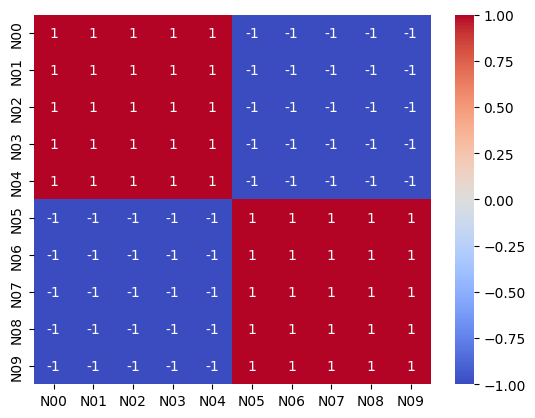

In [12]:
sns.heatmap(matrix_index_sort(Topo_adj(triad_team_generator(5,0,10,self_act=True))), cmap ='coolwarm', annot = True, vmin =-1, vmax = 1)

In [13]:
def unique_shuffle(network,edges):
    t=0
    while t==0:
        network = column_shuffler(network, 'Target')
        network = column_shuffler(network, 'Type')
        network.loc[:,'comb']=network.loc[:,'Source']+network.loc[:,'Target']
        if len(set(network.loc[:,'comb']))==edges:
            for i in range(len(network)):
                if network.loc[i,'Source'] == network.loc[i,'Target']:
                    t=0
                else:
                    t=1
                    return network

In [14]:
def column_shuffler(df, col):
    type_shuffle=list(df.loc[:,col])
    random.shuffle(type_shuffle)
    df.loc[:, col ]=type_shuffle
    return df

In [15]:
def centreing_core(adj,no_core_nodes):
    col=adj.columns
    print(len(adj))
    t=[]
    k=[]
    end_ind_old=len(adj)- no_core_nodes
    end_ind=len(adj)- no_core_nodes
    print(end_ind)
    for i in range(end_ind_old):
        #print(i)
        
        if i in range(int((len(adj)/2))-int(no_core_nodes/2),int((len(adj)/2)) + int(no_core_nodes/2)):
            t.append(col[end_ind])
            end_ind += 1
            k.append(col[i])
        else:
            t.append(col[i])
    print(t,k)
    t=t+k
    t

    adj.index=t
    adj.columns=t
    adj

    adj=adj.sort_index()
    adj=adj.T.sort_index()
    adj=adj.T
    return adj




In [16]:
peri = unique_shuffle(network_generator_topo(150,30),150)
peri.loc[:,:'Type'].to_csv('ori_peri.csv', index=False)
#peri = pd.read_csv('ori_peri.csv')
peri

KeyboardInterrupt: 

In [18]:
core = adj_topify(Topo_adj(triad_team_generator(5,30,10,self_act=True)))
matrix_index_sort(Topo_adj(core))

['N37', 'N32', 'N34', 'N30', 'N33', 'N31', 'N38', 'N39', 'N36', 'N35']
['N37', 'N32', 'N34', 'N30', 'N33', 'N31', 'N38', 'N39', 'N36', 'N35']
['N37', 'N32', 'N34', 'N30', 'N33', 'N31', 'N38', 'N39', 'N36', 'N35']
['N37', 'N32', 'N34', 'N30', 'N33', 'N31', 'N38', 'N39', 'N36', 'N35']


,N30,N31,N32,N33,N34,N35,N36,N37,N38,N39
N30,1,1,1,1,1,-1,-1,-1,-1,-1
N31,1,1,1,1,1,-1,-1,-1,-1,-1
N32,1,1,1,1,1,-1,-1,-1,-1,-1
N33,1,1,1,1,1,-1,-1,-1,-1,-1
N34,1,1,1,1,1,-1,-1,-1,-1,-1
N35,-1,-1,-1,-1,-1,1,1,1,1,1
N36,-1,-1,-1,-1,-1,1,1,1,1,1
N37,-1,-1,-1,-1,-1,1,1,1,1,1
N38,-1,-1,-1,-1,-1,1,1,1,1,1
N39,-1,-1,-1,-1,-1,1,1,1,1,1


In [19]:
middle_generator_ratio_average(core,peri, 2)

20 2 10


,Source,Target,Type,comb
0,N08,N34,2.0,N08N34
1,N28,N30,1.0,N28N30
2,N28,N31,2.0,N28N31
3,N07,N36,2.0,N07N36
4,N04,N38,1.0,N04N38
5,N05,N37,2.0,N05N37
6,N21,N30,2.0,N21N30
7,N21,N34,1.0,N21N34
8,N18,N35,2.0,N18N35
9,N11,N37,2.0,N11N37


In [17]:
def middle_vary_matrix(peri_net,core_net, in_degree_ratio_per_core_node, density,folder, no_core_nodes,trials):
    
    nodes = len(set(peri_net.loc[:,'Source']))
    edges = len(peri_net.loc[:,'Source'])
    if in_degree_ratio_per_core_node != 0:
        for trial in range(trials):
            plt.clf()
            mid_net = middle_generator_ratio_average(core_net,peri_net,in_degree_ratio_per_core_node)
            new_net = mid_net.append([core_net,peri_net])
            adj_new_mat = Topo_adj(new_net)
            adj_new_mat = matrix_index_sort(adj_new_mat)
            #print(adj_new_mat)
            adj_new_mat = centreing_core(adj_new_mat,no_core_nodes)
            plot = sns.heatmap(matrix_index_sort(adj_new_mat), cmap='coolwarm', annot = True)
            fig = plot.get_figure()
            fig.savefig(folder+'/Network_'+str(nodes)+'N_'+ str(edges) +'E_'+ str(in_degree_ratio_per_core_node)+'InDeg_' +'_T'+ str(trial) + '.png')
            adj_new_mat_topo= adj_topify(adj_new_mat)
            adj_new_mat_topo= adj_new_mat_topo.set_index('Source')
            adj_new_mat_topo.loc[:,:'Type'].to_csv(folder+'/Network_'+str(nodes)+'N_'+ str(edges) +'E_'+ str(in_degree_ratio_per_core_node)+'InDeg_' +'_T'+ str(trial) +'.topo', sep='\t')
    else:
        
        for trial in range(trials):
            plt.clf()
            new_net = peri_net.append(core_net)
            adj_new_mat = Topo_adj(new_net)
            adj_new_mat = matrix_index_sort(adj_new_mat)
            #print(adj_new_mat)
            adj_new_mat = centreing_core(adj_new_mat,no_core_nodes)
            plot = sns.heatmap(matrix_index_sort(adj_new_mat), cmap='coolwarm', annot = True)
            #plt.show()
            fig = plot.get_figure()
            fig.savefig(folder+'/Network_'+str(nodes)+'N_'+ str(edges) +'E_'+ str(in_degree_ratio_per_core_node)+'InDeg_' +str(density) +'Density_'+'_T'+ str(trial) + '.png')
            adj_new_mat_topo= adj_topify(adj_new_mat)
            adj_new_mat_topo= adj_new_mat_topo.set_index('Source')
            #adj_new_mat_topo.loc[:,:'Type'].to_csv(folder+'/Network_'+str(nodes)+'N_'+ str(edges) +'E_'+ str(in_degree_ratio_per_core_node)+'InDeg_' +str(density) +'Density_'+'_T'+ str(trial) +  +'.topo', sep='\t')


In [18]:
def reduced_density_toggle_triad(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True):
    flag = True
    denisty  = round(1 - denisty,2)
    #print(denisty)
    while flag:
        df_topo = adj_topify(Topo_adj(triad_team_generator(5,0,15,self_act=True)))
        core_nodes = sorted(list(set(df_topo.iloc[:,0])))
        teams = dict()
        teams[0] = []
        teams[1] = []
        teams[2] = []
        #print(core_nodes)
        ts = len(core_nodes)//3
        #print(ts)
        for i in range(len(core_nodes)):
            teams[i//ts].append(core_nodes[i])
        print(teams)

        df_topo


        for _ in range(int(team_size*team_size*denisty)):
            #print(_,int(team_size*team_size*denisty),team_size,denisty)
            for i in [0,1,2]:
                for j in [0,1,2]:
                    if i != j:
                        t = True
                        while t:
                            source = random.choice(teams[i])
                            target = random.choice(teams[j])
                            #print(source,target)
                            #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                            if int(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type']) == 2:
                                indexing = df_topo[(df_topo['Source'] == source) & (df_topo['Target'] == target)].loc[:,'Type'].index[0]
                                df_topo.loc[ indexing, 'Type'] = 0
                                #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                                t = False
                    
                    elif i == j and reduce_self_act ==True:
                        k = True
                        while k:
                            source = random.choice(teams[i])
                            target = random.choice(teams[j])
                            #print(source,target)
                            #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                            if int(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type']) == 1:
                                indexing = df_topo[(df_topo['Source'] == source) & (df_topo['Target'] == target)].loc[:,'Type'].index[0]
                                df_topo.loc[ indexing, 'Type'] = 0
                                #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                                k = False
        
        flag1 = False

        adjm = Topo_adj(df_topo)
        adj_no_self = Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])
        adj_no_self[adj_no_self == -1] = 1
        adjm[adjm==-1] = 1

        colsum = list(adjm.sum(axis=0))
        #print(colsum)

        colsum_no_self = list(adj_no_self.sum(axis=0))
        
        rowsum = list(adjm.sum(axis=1))
        rowsum_no_self = list(adj_no_self.sum(axis=1))
        print('rowsum_no_self',rowsum_no_self)
        print('colsum_no_self',colsum_no_self)

        


        if len([value for value in rowsum if value <= 2])==0 and len([value for value in rowsum_no_self if value < 1])==0 and len([value for value in colsum_no_self if value < 1])==0  and len([value for value in colsum if value <= 2])==0 :
            flag1 = True
 

        if len(set(df_topo.loc[:,'Source'])) == 15  and len(set(df_topo.loc[:,'Target'])) == 15 and flag1:
            flag = False

    plt.clf()
                   
    sns.heatmap(matrix_index_sort(Topo_adj(df_topo)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'/netfig/'+file+str(trial)+'.png')
    plt.clf()

    sns.heatmap(matrix_index_sort(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'_no_self'+'/netfig/'+file+'_no_self'+str(trial)+'.png')
    plt.clf()

    adj_topify(Topo_adj(df_topo)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)
    adj_topify(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])).to_csv(folder+'_no_self'+'/'+file+'_no_self'+str(trial)+'.topo', sep='\t',index=False)
    
        



In [21]:
def reduced_density_toggle_triad_new(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True):
    flag = True
    denisty  = 1- denisty
    #denisty = denisty*100
    while flag:
        df_topo = adj_topify(Topo_adj(triad_team_generator(5,0,15,self_act=True)))
        core_nodes = sorted(list(set(df_topo.iloc[:,0])))
        teams = dict()
        teams[0] = []
        teams[1] = []
        teams[2] = []
        ts = len(core_nodes)//3
        #print(ts)
        for i in range(len(core_nodes)):
            teams[i//ts].append(core_nodes[i])
        #print(teams)
        #print()

        df_topo



        for i in [0,1,2]:
            for j in [0,1,2]:
                if (i != j or self_act) and (denisty != 0) :

                    source = random.sample(teams[i],team_size)
                    target = random.sample(teams[j],team_size)
                    random.shuffle(source)
                    random.shuffle(target)
                    combi = [s + s1 for s, s1 in zip(source, target)]
                    combi
                    ll = 0 
                    
                    while ll < int(denisty*team_size)-1 :
                        #print(ll)
                        source1 = random.sample(teams[i],team_size)
                        target1 = random.sample(teams[j],team_size)
                        random.shuffle(source1)
                        random.shuffle(target1)

                        comb = [s + s1 for s, s1 in zip(source1, target1)]
                        set1 = set(combi)
                        set2 = set(comb)
                        ll = ll +1
                        #print(set1.intersection(set2),len(set1.intersection(set2)))

                        if len(set1.intersection(set2)) != 0:
                            ll = ll - 1
                        else:
                            source= source + source1
                            target =target + target1
                            combi = combi+ comb
                            #print(source,target)
                            #print(comb)
                        
                    #print(combi)

                    for m in range(len(source)):
                        indexing = df_topo[(df_topo['Source'] == source[m]) & (df_topo['Target'] == target[m])].loc[:,'Type'].index[0]
                        df_topo.loc[ indexing, 'Type'] = 0
        
        
                


        
        if len(set(df_topo.loc[:,'Source'])) == 15  and len(set(df_topo.loc[:,'Target'])) == 15:
             flag = False

    plt.clf()
                   
    sns.heatmap(matrix_index_sort(Topo_adj(df_topo)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'/netfig/'+file+str(trial)+'.png')
    plt.clf()

    sns.heatmap(matrix_index_sort(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'_no_self'+'/netfig/'+file+'_no_self'+str(trial)+'.png')
    plt.clf()

    adj_topify(Topo_adj(df_topo)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)
    adj_topify(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])).to_csv(folder+'_no_self'+'/'+file+'_no_self'+str(trial)+'.topo', sep='\t',index=False)
    
        


In [18]:
# for i in range(10):
#       reduced_density_toggle_triad_new(5,0,15,1,'Toggle_triad/TT_Density_100','TT_Avg_Density_100_Network_15N_core',i,True,True)

In [24]:
# for i in range(100):
#       reduced_density_toggle_triad_new(5,0,15,0.2,'Toggle_triad/TT_Density_20','TT_Avg_Density_20_Network_15N_core',i,True,True)

In [ ]:
# for i in range(100):
#       reduced_density_toggle_triad_new(5,0,15,0.6,'Toggle_triad/TT_Density_20','TT_Avg_Density_20_Network_15N_core',i,True,True)

In [69]:
# for i in range(100):
#     reduced_density_toggle_triad(5,0,15,0.8,'Toggle_triad/TT_Density_80','TT_Avg_Density_80_Network_15N_core',i,True,True)

# for i in range(100):
#      reduced_density_toggle_triad(5,0,15,0.6,'Toggle_triad/TT_Density_60','TT_Avg_Density_60_Network_15N_core',i,True,True)


for i in range(100):
     reduced_density_toggle_triad(5,0,15,0.4,'New_Set/TT_Density_40','TT_Avg_Density_40_Network_15N_core',i,True,True)



# # for i in range(100):
# #      reduced_density_toggle_triad(5,0,15,0.2,'Toggle_triad/TT_Density_20','TT_Avg_Density_20_Network_10N_core',i,True,True)







# # for i in range(10):
# #     reduced_density_toggle_triad(5,0,10,1,'Density_100','Avg_Density_100_Network_10N_core',i,True,True)

['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09'], 2: ['N10', 'N11', 'N12', 'N13', 'N14']}
['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
rowsum_no_self [9, 9, 8, 7, 6, 7, 9, 7, 6, 9, 9, 8, 10, 7, 9]
colsum_no_self [9, 5, 7, 9, 9, 8, 8, 8, 8, 7, 10, 8, 9, 8, 7]
['N12', 'N10', 'N00', 'N14', 'N13', 'N02', 'N11', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N12', 'N10'

<Figure size 640x480 with 0 Axes>

In [119]:
# for i in range(100):
#       reduced_density_toggle_triad(5,0,15,0.2,'Toggle_triad/TT_Density_20','TT_Avg_Density_20_Network_10N_core',i,True,True)

['N42', 'N32', 'N30', 'N37', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
['N42', 'N32', 'N30', 'N37', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
{0: ['N30', 'N31', 'N32', 'N33', 'N34'], 1: ['N35', 'N36', 'N37', 'N38', 'N39'], 2: ['N40', 'N41', 'N42', 'N43', 'N44']}
['N42', 'N37', 'N32', 'N30', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
['N42', 'N37', 'N32', 'N30', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
['N42', 'N37', 'N32', 'N30', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
['N42', 'N37', 'N32', 'N30', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
rowsum_no_self [2, 1, 2, 4, 2, 1, 1, 2, 2, 3, 3, 1, 1, 2, 3]
colsum_no_self [0, 3, 3, 2, 2, 2, 3, 1, 2, 1, 4, 1, 2, 2, 2]
['N42', 'N32', 'N30', 'N37', 'N39', 'N43', 'N31', 'N33', 'N40', 'N36', 'N41', 'N34', 'N35', 'N44', 'N38']
['N42', 'N32', 

KeyboardInterrupt: 

In [ ]:
# for i in range(100):
#     reduced_density_toggle_triad(5,0,10,0.2,'Density_20','Density_20_Network_10N_core',i,True,True)

# for i in range(100):
#       reduced_density_toggle_triad(5,0,10,0.4,'Density_40','Density_40_Network_10N_core',i,True,True)

# for i in range(100):
#      reduced_density_toggle_triad(5,0,10,0.6,'Density_60','Density_60_Network_10N_core',i,True,True)

for i in range(100):
      reduced_density_toggle_triad(5,0,10,0.8,'Density_80','Density_80_Network_10N_core',i,True,True)

# for i in range(100):
#      reduced_density_toggle_triad(5,0,10,1,'Density_100','Density_80_Network_10N_core',i,True,True)

In [ ]:
for i in range(100):
     reduced_density_toggle_triad(5,0,10,1,'Density_100','Density_80_Network_10N_core',i,True,True)

In [20]:
# def reduced_density_toggle_triad_new(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True):
#     flag = True
#     denisty  = 1- denisty
#     #denisty = denisty*100
#     while flag:
#         df_topo = adj_topify(Topo_adj(triad_team_generator(5,30,10,self_act=True)))
#         core_nodes = sorted(list(set(df_topo.iloc[:,0])))
#         teams = dict()
#         teams[0] = []
#         teams[1] = []
#         ts = len(core_nodes)//2
#         #print(ts)
#         for i in range(len(core_nodes)):
#             teams[i//ts].append(core_nodes[i])
#         #print(teams)
#         #print()

#         df_topo



#         for i in [0,1]:
#             for j in [0,1]:
#                 if (i != j or self_act) and (denisty != 0) :

#                     source = random.sample(teams[i],team_size)
#                     target = random.sample(teams[j],team_size)
#                     random.shuffle(source)
#                     random.shuffle(target)
#                     combi = [s + s1 for s, s1 in zip(source, target)]
#                     combi
#                     ll = 0 
                    
#                     while ll < int(denisty*team_size)-1 :
#                         #print(ll)
#                         source1 = random.sample(teams[i],team_size)
#                         target1 = random.sample(teams[j],team_size)
#                         random.shuffle(source1)
#                         random.shuffle(target1)

#                         comb = [s + s1 for s, s1 in zip(source1, target1)]
#                         set1 = set(combi)
#                         set2 = set(comb)
#                         ll = ll +1
#                         #print(set1.intersection(set2),len(set1.intersection(set2)))

#                         if len(set1.intersection(set2)) != 0:
#                             ll = ll - 1
#                         else:
#                             source= source + source1
#                             target =target + target1
#                             combi = combi+ comb
#                             #print(source,target)
#                             #print(comb)
                        
#                     #print(combi)

#                     for m in range(len(source)):
#                         indexing = df_topo[(df_topo['Source'] == source[m]) & (df_topo['Target'] == target[m])].loc[:,'Type'].index[0]
#                         df_topo.loc[ indexing, 'Type'] = 0
                


        
#         if len(set(df_topo.loc[:,'Source'])) == 10  and len(set(df_topo.loc[:,'Target'])) == 10:
#              flag = False

#     plt.clf()
                   
#     sns.heatmap(matrix_index_sort(Topo_adj(df_topo)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
#     plt.savefig(folder+'/'+file+str(trial)+'.png')
    
#     adj_topify(Topo_adj(df_topo)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)
        



In [21]:
# for i in range(1):
#     reduced_density_toggle_triad_new(5,0,10,0.2,'Pure_Core','Density_20_Network_10N_core',i,True,True)

In [22]:
# for i in range(100):
#     reduced_density_toggle_triad_new(5,0,10,0.2,'Density_20','Density_20_Network_10N_core',i,True,True)

# for i in range(100):
#     reduced_density_toggle_triad_new(5,0,10,0.4,'Density_40','Density_40_Network_10N_core',i,True,True)

# for i in range(100):
#     reduced_density_toggle_triad_new(5,0,10,0.6,'Density_60','Density_60_Network_10N_core',i,True,True)

# for i in range(100):
#     reduced_density_toggle_triad_new(5,0,10,1,'Density_100','Density_80_Network_10N_core',i,True,True)

In [23]:
# for i in range(100):
#     reduced_density_toggle_triad_new(5,0,10,1,'Density_100','Density_100_Network_10N_core',i,True,True)

In [24]:
# for i in range(100):
#     reduced_density_toggle_triad_new(5,0,10,1,'Density_100','Density_100_Network_10N_core',i,True,True)

In [25]:
# #for i in range(1):
# #    reduced_density_toggle_triad(5,0,10,1,'Pure_Core','Density_100_Network_10N_core',i,True,True)
# for i in range(1):
#     reduced_density_toggle_triad_new(5,0,10,0.6,'Pure_Core','Density_60_Network_10N_core',i,True,True)

# for i in range(1):
#     reduced_density_toggle_triad_new(5,0,10,0.4,'Pure_Core','Density_40_Network_10N_core',i,True,True)

# for i in range(1):
#     reduced_density_toggle_triad_new(5,0,10,0.2,'Pure_Core','Density_20_Network_10N_core',i,True,True)

In [26]:
# reduced_density_toggle_triad(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True)

In [27]:
# middle_vary_matrix(peri,core, 0,60 ,'indegree0',10,10)

In [28]:
# middle_vary_matrix(peri,core, in_degree_ratio_per_core_node, folder, no_core_nodes,trials)

In [29]:
# df_topo = adj_topify(Topo_adj(triad_team_generator(5,30,10,self_act=True)))
# core_nodes = sorted(list(set(df_topo.iloc[:,0])))
# teams = dict()
# teams[0] = []
# teams[1] = []
# ts = len(core_nodes)//2
# print(ts)
# for i in range(len(core_nodes)):
#     teams[i//ts].append(core_nodes[i])
# print(teams)

In [30]:
# team_size = 5

In [31]:
# dfg = pd.DataFrame([[0]*3]*team_size*, columns =['Source','Target','Type'])
# dfg.loc[:,'Source'] = teams[0]
# dfg.loc[:,'Target'] = teams[0]
# dfg.loc[:,'Type'] = 1

# unique_shuffle(dfg,5)

In [32]:
# def perfect_cores(density,team_size):
    

In [22]:
def reduced_density_toggle_switch_new(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True):
    flag = True
    denisty  = 1- denisty
    #denisty = denisty*100
    while flag:
        df_topo = adj_topify(Topo_adj(triad_team_generator(5,0,10,self_act=True)))
        core_nodes = sorted(list(set(df_topo.iloc[:,0])))
        teams = dict()
        teams[0] = []
        teams[1] = []
        #teams[2] = []
        ts = len(core_nodes)//2
        #print(ts)
        for i in range(len(core_nodes)):
            teams[i//ts].append(core_nodes[i])
        #print(teams)
        #print()

        df_topo



        for i in [0,1]:
            for j in [0,1]:
                if (i != j or self_act) and (denisty != 0) :

                    source = random.sample(teams[i],team_size)
                    target = random.sample(teams[j],team_size)
                    random.shuffle(source)
                    random.shuffle(target)
                    combi = [s + s1 for s, s1 in zip(source, target)]
                    combi
                    ll = 0 
                    
                    while ll < int(denisty*team_size)-1 :
                        #print(ll)
                        source1 = random.sample(teams[i],team_size)
                        target1 = random.sample(teams[j],team_size)
                        random.shuffle(source1)
                        random.shuffle(target1)

                        comb = [s + s1 for s, s1 in zip(source1, target1)]
                        set1 = set(combi)
                        set2 = set(comb)
                        ll = ll +1
                        #print(set1.intersection(set2),len(set1.intersection(set2)))

                        if len(set1.intersection(set2)) != 0:
                            ll = ll - 1
                        else:
                            source= source + source1
                            target =target + target1
                            combi = combi+ comb
                            #print(source,target)
                            #print(comb)
                        
                    #print(combi)

                    for m in range(len(source)):
                        indexing = df_topo[(df_topo['Source'] == source[m]) & (df_topo['Target'] == target[m])].loc[:,'Type'].index[0]
                        df_topo.loc[ indexing, 'Type'] = 0
        
        
                


        
        if len(set(df_topo.loc[:,'Source'])) == 10  and len(set(df_topo.loc[:,'Target'])) == 10:
             flag = False

    plt.clf()
                   
    sns.heatmap(matrix_index_sort(Topo_adj(df_topo)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'/netfig/'+file+str(trial)+'.png')
    plt.clf()

    sns.heatmap(matrix_index_sort(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'_no_self'+'/netfig/'+file+'_no_self'+str(trial)+'.png')
    plt.clf()

    adj_topify(Topo_adj(df_topo)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)
    adj_topify(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])).to_csv(folder+'_no_self'+'/'+file+'_no_self'+str(trial)+'.topo', sep='\t',index=False)
    
        


In [23]:
def reduced_density_toggle_switch(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True):
    flag = True
    denisty  = round(1 - denisty,2)
    #print(denisty)
    while flag:
        df_topo = adj_topify(Topo_adj(triad_team_generator(5,0,10,self_act=True)))
        core_nodes = sorted(list(set(df_topo.iloc[:,0])))
        teams = dict()
        teams[0] = []
        teams[1] = []
        #print(core_nodes)
        ts = len(core_nodes)//2
        #print(ts)
        for i in range(len(core_nodes)):
            teams[i//ts].append(core_nodes[i])
        print(teams)

        df_topo


        for _ in range(int(team_size*team_size*denisty)):
            #print(_,int(team_size*team_size*denisty),team_size,denisty)
            for i in [0,1]:
                for j in [0,1]:
                    if i != j:
                        t = True
                        while t:
                            source = random.choice(teams[i])
                            target = random.choice(teams[j])
                            #print(source,target)
                            #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                            if int(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type']) == 2:
                                indexing = df_topo[(df_topo['Source'] == source) & (df_topo['Target'] == target)].loc[:,'Type'].index[0]
                                df_topo.loc[ indexing, 'Type'] = 0
                                #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                                t = False
                    
                    elif i == j and reduce_self_act ==True:
                        k = True
                        while k:
                            source = random.choice(teams[i])
                            target = random.choice(teams[j])
                            #print(source,target)
                            #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                            if int(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type']) == 1:
                                indexing = df_topo[(df_topo['Source'] == source) & (df_topo['Target'] == target)].loc[:,'Type'].index[0]
                                df_topo.loc[ indexing, 'Type'] = 0
                                #print(df_topo[(df_topo['Source'] == source ) & (df_topo['Target'] == target)].loc[:,'Type'])
                                k = False
        
        
        try:
            adjm = Topo_adj(df_topo)
            adj_no_self = Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])
            adj_only_self = Topo_adj(df_topo[df_topo.loc[:,'Type']== 1])
        except:
            flag1 = True
        else:
            flag1 = False


            
            adj_no_self[adj_no_self == -1] = 1
            adjm[adjm==-1] = 1

            colsum = list(adjm.sum(axis=0))
            rowsum = list(adjm.sum(axis=1))
            #print(colsum)

            colsum_no_self = list(adj_no_self.sum(axis=0))
            rowsum_no_self = list(adj_no_self.sum(axis=1))

            colsum_only_self = list(adj_only_self.sum(axis=0))
            rowsum_only_self = list(adj_only_self.sum(axis=1))
            print('rowsum_no_self',rowsum_no_self)
            print('colsum_no_self',colsum_no_self)

        


            if len([value for value in rowsum if value < 2])==0 and len([value for value in rowsum_no_self if value < 1])==0 and len([value for value in rowsum_only_self if value < 1])==0 and len([value for value in colsum_no_self if value < 1])==0  and len([value for value in colsum if value < 2])==0 and len([value for value in colsum_only_self if value < 1])==0 :
                flag1 = True
    

            if len(set(df_topo.loc[:,'Source'])) == 10  and len(set(df_topo.loc[:,'Target'])) == 10 and flag1:
                flag = False

    plt.clf()
                   
    sns.heatmap(matrix_index_sort(Topo_adj(df_topo)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'/netfig/'+file+str(trial)+'.png')
    plt.clf()

    sns.heatmap(matrix_index_sort(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'_no_self'+'/netfig/'+file+'_no_self'+str(trial)+'.png')
    plt.clf()

    adj_topify(Topo_adj(df_topo)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)
    adj_topify(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])).to_csv(folder+'_no_self'+'/'+file+'_no_self'+str(trial)+'.topo', sep='\t',index=False)
    
        



In [24]:
def imupirity_adder_triad(topo_retrived, percentage_impurity, folder,file,trial, forward):
    topo_retrived
    density = len(topo_retrived)/225
    Team1 = ['N00','N01','N02','N03','N04']
    Team2 = ['N05','N06','N07','N008','N09']
    Team3 = ['N10','N11','N12','N13','N14']
    if forward:
        for k in range(int(len(topo_retrived)*percentage_impurity/9)): 
            for i in [Team1 ,Team2,Team3]:
                for j in [Team1 ,Team2,Team3]:
                    if i != j:
                        middle_topo_indices = list(topo_retrived[(topo_retrived.loc[:,'Source'].isin(i)) & (topo_retrived.loc[:,'Target'].isin(j)) & (topo_retrived.loc[:,'Type'] == 2)].index)

                        selected_number = random.choice(middle_topo_indices)
                        topo_retrived.loc[selected_number, 'Type'] = 1

                    else:
                        middle_topo_indices = list(topo_retrived[(topo_retrived.loc[:,'Source'].isin(i)) & (topo_retrived.loc[:,'Target'].isin(j)) & (topo_retrived.loc[:,'Type'] == 1)].index)

                        selected_number = random.choice(middle_topo_indices)
                        topo_retrived.loc[selected_number, 'Type'] = 2
    else:
        for k in range(int(len(topo_retrived)*percentage_impurity/9)): 
            for i in [Team1 ,Team2,Team3]:
                for j in [Team1 ,Team2,Team3]:
                    if i == j:
                        middle_topo_indices = list(topo_retrived[(topo_retrived.loc[:,'Source'].isin(i)) & (topo_retrived.loc[:,'Target'].isin(j)) & (topo_retrived.loc[:,'Type'] == 2)].index)

                        selected_number = random.choice(middle_topo_indices)
                        topo_retrived.loc[selected_number, 'Type'] = 1

                    else:
                        middle_topo_indices = list(topo_retrived[(topo_retrived.loc[:,'Source'].isin(i)) & (topo_retrived.loc[:,'Target'].isin(j)) & (topo_retrived.loc[:,'Type'] == 1)].index)

                        selected_number = random.choice(middle_topo_indices)
                        topo_retrived.loc[selected_number, 'Type'] = 2

    
    plt.clf()
                   
    sns.heatmap(matrix_index_sort(Topo_adj(topo_retrived)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    plt.savefig(folder+'/netfig/'+file+str(trial)+'.png')
    plt.clf()

    adj_topify(Topo_adj(topo_retrived)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)

    return topo_retrived
            

            


In [29]:
def reduced_density_toggle_switch_new_get(team_size,start,nodes,denisty ,folder,file,trial,reduce_self_act=False,self_act=True):
    flag = True
    denisty  = 1- denisty
    #denisty = denisty*100
    while flag:
        df_topo = adj_topify(Topo_adj(triad_team_generator(5,0,10,self_act=True)))
        core_nodes = sorted(list(set(df_topo.iloc[:,0])))
        teams = dict()
        teams[0] = []
        teams[1] = []
        #teams[2] = []
        ts = len(core_nodes)//2
        #print(ts)
        for i in range(len(core_nodes)):
            teams[i//ts].append(core_nodes[i])
        #print(teams)
        #print()

        df_topo



        for i in [0,1]:
            for j in [0,1]:
                if (i != j or self_act) and (denisty != 0) :

                    source = random.sample(teams[i],team_size)
                    target = random.sample(teams[j],team_size)
                    random.shuffle(source)
                    random.shuffle(target)
                    combi = [s + s1 for s, s1 in zip(source, target)]
                    combi
                    ll = 0 
                    
                    while ll < int(denisty*team_size)-1 :
                        #print(ll)
                        source1 = random.sample(teams[i],team_size)
                        target1 = random.sample(teams[j],team_size)
                        random.shuffle(source1)
                        random.shuffle(target1)

                        comb = [s + s1 for s, s1 in zip(source1, target1)]
                        set1 = set(combi)
                        set2 = set(comb)
                        ll = ll +1
                        #print(set1.intersection(set2),len(set1.intersection(set2)))

                        if len(set1.intersection(set2)) != 0:
                            ll = ll - 1
                        else:
                            source= source + source1
                            target =target + target1
                            combi = combi+ comb
                            #print(source,target)
                            #print(comb)
                        
                    #print(combi)

                    for m in range(len(source)):
                        indexing = df_topo[(df_topo['Source'] == source[m]) & (df_topo['Target'] == target[m])].loc[:,'Type'].index[0]
                        df_topo.loc[ indexing, 'Type'] = 0
        
        
                


        
        if len(set(df_topo.loc[:,'Source'])) == 10  and len(set(df_topo.loc[:,'Target'])) == 10:
             flag = False
    
    return df_topo

    # plt.clf()
                   
    # sns.heatmap(matrix_index_sort(Topo_adj(df_topo)), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    # plt.savefig(folder+'/netfig/'+file+str(trial)+'.png')
    # plt.clf()

    # sns.heatmap(matrix_index_sort(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])), cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)
    # plt.savefig(folder+'_no_self'+'/netfig/'+file+'_no_self'+str(trial)+'.png')
    # plt.clf()

    # adj_topify(Topo_adj(df_topo)).to_csv(folder+'/'+file+str(trial)+'.topo', sep='\t',index=False)
    # adj_topify(Topo_adj(df_topo[df_topo.loc[:,'Type']!= 1])).to_csv(folder+'_no_self'+'/'+file+'_no_self'+str(trial)+'.topo', sep='\t',index=False)
    
        


In [32]:
def edge_adder_toggle_switch(topo_retrived, edges, folder,file,trial):
    topo_retrived
    density = len(topo_retrived)/225
    Team1 = ['N00','N01','N02','N03','N04']
    Team2 = ['N05','N06','N07','N08','N09']


    for k in range(edges): 
        for i in [Team1 ,Team2]:
            for j in [Team1 , Team2]:
                if i != j:
                    middle_topo_indices = list(topo_retrived[(topo_retrived.loc[:,'Source'].isin(i)) & (topo_retrived.loc[:,'Target'].isin(j)) & (topo_retrived.loc[:,'Type'] == 0)].index)
                    selected_number = random.choice(middle_topo_indices)
                    topo_retrived.loc[selected_number, 'Type'] = 2

                else:
                    middle_topo_indices = list(topo_retrived[(topo_retrived.loc[:,'Source'].isin(i)) & (topo_retrived.loc[:,'Target'].isin(j)) & (topo_retrived.loc[:,'Type'] == 0)].index)

                    selected_number = random.choice(middle_topo_indices)
                    topo_retrived.loc[selected_number, 'Type'] = 1

    

    return topo_retrived
            

            



In [41]:
for i in range(100):
    topo_retrived = reduced_density_toggle_switch_new_get(5,0,10,0.2,'Density_32','Density_32_Network_10N_core',0,True,True)
    topo_retrived = adj_topify(matrix_index_sort(Topo_adj(edge_adder_toggle_switch(topo_retrived, 3, 'a','a',1))))
    topo_retrived.to_csv('Density_32/Density_32_Network_10N_core'+str(i)+'.topo', sep='\t',index=False)
    plt.clf()
    sns.heatmap(matrix_index_sort(Topo_adj(topo_retrived)), cmap = 'coolwarm', annot = True)
    plt.savefig('Density_32/netfig/Density_32_Network_10N_core'+str(i)+'.png')
    plt.clf()
    topo_retrived = topo_retrived[topo_retrived['Type']==2]
    topo_retrived.to_csv('Density_32_no_self/Density_32_no_self_Network_10N_core'+str(i)+'.topo', sep='\t',index=False)
    plt.savefig('Density_32_no_self/netfig/Density_32_no_self_Network_10N_core'+str(i)+'.png')

['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N04', 'N03', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N04', 'N03', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N04', 'N03', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N04', 'N03', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05', 'N09', 'N03', 'N04', 'N01', 'N07', 'N00', 'N06', 'N02', 'N08']
['N05'

<Figure size 640x480 with 0 Axes>

In [37]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.4,'New_Set/Density_40','Density_40_Network_10N_core',i,True,True)


['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
rowsum_no_self [2, 1, 2, 1, 2, 4, 2, 1, 1, 4]
colsum_no_self [3, 1, 3, 2, 1, 2, 2, 3, 2, 1]
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N0

<Figure size 640x480 with 0 Axes>

In [39]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.6,'New_Set/Density_60','Density_60_Network_10N_core',i,True,True)


['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
rowsum_no_self [3, 1, 4, 3, 2, 3, 4, 3, 3, 4]
colsum_no_self [3, 3, 4, 3, 2, 3, 3, 3, 2, 4]
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N00', 'N05', 'N01', 'N07']
['N06', 'N02', 'N04', 'N09', 'N08', 'N03', 'N0

<Figure size 640x480 with 0 Axes>

In [23]:
for i in range(10):
      reduced_density_toggle_switch(5,0,10,1,'Density_100','Density_100_Network_10N_core',i,True,True)


['N05', 'N07', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N05', 'N07', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N05', 'N07', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
rowsum_no_self [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
colsum_no_self [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N05', 'N07', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N09', 'N04', 'N06', 'N03']
['N07', 'N05', 'N01', 'N08', 'N00', 'N02', 'N0

<Figure size 640x480 with 0 Axes>

In [35]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.6,'Density_60','Density_60_Network_10N_core',i,True,True)


['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
rowsum_no_self [4, 2, 4, 4, 3, 3, 2, 3, 4, 1]
colsum_no_self [4, 0, 4, 2, 4, 1, 3, 4, 4, 4]
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 

<Figure size 640x480 with 0 Axes>

In [36]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.8,'Density_80','Density_80_Network_10N_core',i,True,True)


['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
rowsum_no_self [4, 4, 4, 3, 4, 5, 3, 5, 4, 4]
colsum_no_self [5, 4, 4, 4, 4, 5, 3, 4, 4, 3]
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N01', 'N04', 'N03', 'N09']
['N00', 'N02', 'N07', 'N06', 'N05', 'N08', 'N0

<Figure size 640x480 with 0 Axes>

In [28]:
for i in range(100):
    reduced_density_toggle_switch_new(5,0,10,0.2,'Density_20','Density_20_Network_10N_core',i,True,True)



['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00', 'N07', 'N08', 'N09', 'N02', 'N06', 'N01', 'N03', 'N05', 'N04']
['N00'

<Figure size 640x480 with 0 Axes>

In [23]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.52,'Density_52','Density_52_Network_10N_core',i,True,True)


['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
rowsum_no_self [2, 1, 3, 2, 5, 3, 2, 3, 3, 2]
colsum_no_self [3, 4, 2, 3, 3, 2, 3, 0, 2, 4]
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N06', 'N03', 'N01', 

<Figure size 640x480 with 0 Axes>

In [24]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.72,'Density_72','Density_72_Network_10N_core',i,True,True)


['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
rowsum_no_self [3, 4, 3, 4, 3, 2, 4, 4, 5, 4]
colsum_no_self [3, 4, 3, 4, 4, 4, 4, 3, 3, 4]
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N0

<Figure size 640x480 with 0 Axes>

In [25]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.92,'Density_92','Density_92_Network_10N_core',i,True,True)

['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
rowsum_no_self [4, 5, 5, 4, 5, 5, 5, 5, 5, 3]
colsum_no_self [5, 5, 5, 5, 4, 5, 3, 4, 5, 5]
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N0

<Figure size 640x480 with 0 Axes>

In [26]:
for i in range(100):
      reduced_density_toggle_switch(5,0,10,0.32,'Density_32','Density_32_Network_10N_core',i,True,True)

['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N09', 'N04', 'N08']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
{0: ['N00', 'N01', 'N02', 'N03', 'N04'], 1: ['N05', 'N06', 'N07', 'N08', 'N09']}
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00', 'N02', 'N06', 'N03', 'N01', 'N05', 'N09', 'N04', 'N08', 'N07']
['N00',

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>